In [25]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from pyspark.sql import functions as F

In [26]:
# Initialize Spark session
spark = (
    SparkSession.builder.appName("MAST30034 Project 2")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

24/10/05 21:16:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/10/05 21:16:11 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [30]:
prop_data_df = spark.read.parquet("../data/curated/prop_cleaned.parquet")
prop_data_df.limit(5)


postal_code,name,property_url,beds,baths,parkings,cost,unit_floor,street,suburb,state,built_in_wardrobes,dishwasher,air_conditioning,floorboards,secure_parking,intercom,heating,ensuite,balcony_deck,gym,furnished,close_to_shops,close_to_transport,fully_fenced,close_to_schools,ducted_heating,split_system_heating,swimming_pool,remote_garage,balcony,study,garden_courtyard,pets_allowed,internal_laundry,alarm_system,prop_type_index,parks_count,parks_average_travel_time_mins,parks_average_travel_distance_kms,parks_time_distance_product,schools_count,schools_average_travel_time_mins,schools_average_travel_distance_kms,schools_time_distance_product,supermarkets_count,supermarkets_average_travel_time_mins,supermarkets_average_travel_distance_kms,supermarkets_time_distance_product,hospitals_count,hospitals_average_travel_time_mins,hospitals_average_travel_distance_kms,hospitals_time_distance_product,shopping_districts_count,shopping_districts_average_travel_time_mins,shopping_districts_average_travel_distance_kms,shopping_districts_time_distance_product,cbd_count,cbd_average_travel_time_mins,cbd_average_travel_distance_kms,cbd_time_distance_product,train_stations_count,train_stations_average_travel_time_mins,train_stations_average_travel_distance_kms,train_stations_time_distance_product,mar_2000,jun_2000,sep_2000,dec_2000,mar_2001,jun_2001,sep_2001,dec_2001,mar_2002,jun_2002,sep_2002,dec_2002,mar_2003,jun_2003,sep_2003,dec_2003,mar_2004,jun_2004,sep_2004,dec_2004,mar_2005,jun_2005,sep_2005,dec_2005,mar_2006,jun_2006,sep_2006,dec_2006,mar_2007,jun_2007,sep_2007,dec_2007,mar_2008,jun_2008,sep_2008,dec_2008,mar_2009,jun_2009,sep_2009,dec_2009,mar_2010,jun_2010,sep_2010,dec_2010,mar_2011,jun_2011,sep_2011,dec_2011,mar_2012,jun_2012,sep_2012,dec_2012,mar_2013,jun_2013,sep_2013,dec_2013,mar_2014,jun_2014,sep_2014,dec_2014,mar_2015,jun_2015,sep_2015,dec_2015,mar_2016,jun_2016,sep_2016,dec_2016,mar_2017,jun_2017,sep_2017,dec_2017,mar_2018,jun_2018,sep_2018,dec_2018,mar_2019,jun_2019,sep_2019,dec_2019,mar_2020,jun_2020,sep_2020,dec_2020,mar_2021,jun_2021,sep_2021,dec_2021,mar_2022,jun_2022,sep_2022,dec_2022,mar_2023,annual_increase,median_inc,2022_pop,2023_pop,pop_percentage_increase
3000,410/7 katherine p...,https://www.domai...,2,2,1,760,1,410/7 katherine p...,melbourne,vic,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,22.0,3.796666666666667,1.5133333333333334,5.745622222222223,2.0,3.31,1.4,4.6339999999999995,17.0,2.75,1.0799999999999998,2.9699999999999998,0.0,8.31,3.0,22.5201,8.0,3.426666666666667,1.3166666666666667,4.5117777777777786,1.0,3.32,1.4,4.648,3.0,4.375,1.65,7.21875,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,310.0,310.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,303.0,303.0,310.0,310.0,315.0,320.0,320.0,340.0,350.0,350.0,360.0,370.0,380.0,390.0,399.0,400.0,400.0,401.0,400.0,410.0,410.0,420.0,420.0,420.0,430.0,430.0,430.0,440.0,440.0,440.0,445.0,450.0,449.0,440.0,435.0,430.0,435.0,435.0,440.0,440.0,440.0,440.0,445.0,450.0,450.0,450.0,460.0,470.0,480.0,480.0,490.0,495.0,495.0,490.0,495.0,500.0,500.0,510.0,510.0,510.0,495.0,460.0,420.0,380.0,369.0,350.0,350.0,365.0,390.0,419.0,450.0,500.0,1.7891498549299083,38222.27067556402,15724.680567083857,18121.738315239138,15.243920141519387
3000,2109/120 a'becket...,https://www.domai...,2,2,1,750,1,2109/120 a'becket...,melbourne,vic,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,8.65,2.99,20.8088,5.0,2.69,1.0725,2.885025,23.0,2.174782608695652,0.8843478260869565,1.9232642722117201,0.0,8.31,3.0,22.5201,11.0,2.4116666666666666,0.9533333333333335,2.2991222222222225,1.0,1.94,0.69,1.3385999999999998,0.0,7.64,3.0,21.154600000000002,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,310.0,310.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,303.0,303.0,310.0,310.0,315.0,320.0,320.0,340.0,350.0,350.0,360.0,370.0,380.0,390.0,399.0,400.0,400.0,401.0,400.0,410.0,410.0,420.0,420.0,420.0,430.0,430.0,430.0,440.0,440.0,440.0,445.0,450.0,449.0,440.0,

In [31]:
# Print the schema to see the column names and types
prop_data_df.printSchema()

root
 |-- postal_code: string (nullable = true)
 |-- name: string (nullable = true)
 |-- property_url: string (nullable = true)
 |-- beds: integer (nullable = true)
 |-- baths: integer (nullable = true)
 |-- parkings: integer (nullable = true)
 |-- cost: integer (nullable = true)
 |-- unit_floor: string (nullable = true)
 |-- street: string (nullable = true)
 |-- suburb: string (nullable = true)
 |-- state: string (nullable = true)
 |-- built_in_wardrobes: integer (nullable = true)
 |-- dishwasher: integer (nullable = true)
 |-- air_conditioning: integer (nullable = true)
 |-- floorboards: integer (nullable = true)
 |-- secure_parking: integer (nullable = true)
 |-- intercom: integer (nullable = true)
 |-- heating: integer (nullable = true)
 |-- ensuite: integer (nullable = true)
 |-- balcony_deck: integer (nullable = true)
 |-- gym: integer (nullable = true)
 |-- furnished: integer (nullable = true)
 |-- close_to_shops: integer (nullable = true)
 |-- close_to_transport: integer (nulla

In [32]:
prop_data_df = prop_data_df.drop("unit_floor", "street", "suburb", "state")

prop_data_df = prop_data_df.withColumn("postal_code", col("postal_code").cast("int"))

prop_data_df.printSchema()

root
 |-- postal_code: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- property_url: string (nullable = true)
 |-- beds: integer (nullable = true)
 |-- baths: integer (nullable = true)
 |-- parkings: integer (nullable = true)
 |-- cost: integer (nullable = true)
 |-- built_in_wardrobes: integer (nullable = true)
 |-- dishwasher: integer (nullable = true)
 |-- air_conditioning: integer (nullable = true)
 |-- floorboards: integer (nullable = true)
 |-- secure_parking: integer (nullable = true)
 |-- intercom: integer (nullable = true)
 |-- heating: integer (nullable = true)
 |-- ensuite: integer (nullable = true)
 |-- balcony_deck: integer (nullable = true)
 |-- gym: integer (nullable = true)
 |-- furnished: integer (nullable = true)
 |-- close_to_shops: integer (nullable = true)
 |-- close_to_transport: integer (nullable = true)
 |-- fully_fenced: integer (nullable = true)
 |-- close_to_schools: integer (nullable = true)
 |-- ducted_heating: integer (nullable = true)
 

## OUTLIER ANALYSIS

In [33]:
prop_data_df.describe()

24/10/05 21:18:04 WARN DAGScheduler: Broadcasting large task binary with size 1476.7 KiB
24/10/05 21:18:47 WARN DAGScheduler: Broadcasting large task binary with size 1476.7 KiB


summary,postal_code,name,property_url,beds,baths,parkings,cost,built_in_wardrobes,dishwasher,air_conditioning,floorboards,secure_parking,intercom,heating,ensuite,balcony_deck,gym,furnished,close_to_shops,close_to_transport,fully_fenced,close_to_schools,ducted_heating,split_system_heating,swimming_pool,remote_garage,balcony,study,garden_courtyard,pets_allowed,internal_laundry,alarm_system,prop_type_index,parks_count,parks_average_travel_time_mins,parks_average_travel_distance_kms,parks_time_distance_product,schools_count,schools_average_travel_time_mins,schools_average_travel_distance_kms,schools_time_distance_product,supermarkets_count,supermarkets_average_travel_time_mins,supermarkets_average_travel_distance_kms,supermarkets_time_distance_product,hospitals_count,hospitals_average_travel_time_mins,hospitals_average_travel_distance_kms,hospitals_time_distance_product,shopping_districts_count,shopping_districts_average_travel_time_mins,shopping_districts_average_travel_distance_kms,shopping_districts_time_distance_product,cbd_count,cbd_average_travel_time_mins,cbd_average_travel_distance_kms,cbd_time_distance_product,train_stations_count,train_stations_average_travel_time_mins,train_stations_average_travel_distance_kms,train_stations_time_distance_product,mar_2000,jun_2000,sep_2000,dec_2000,mar_2001,jun_2001,sep_2001,dec_2001,mar_2002,jun_2002,sep_2002,dec_2002,mar_2003,jun_2003,sep_2003,dec_2003,mar_2004,jun_2004,sep_2004,dec_2004,mar_2005,jun_2005,sep_2005,dec_2005,mar_2006,jun_2006,sep_2006,dec_2006,mar_2007,jun_2007,sep_2007,dec_2007,mar_2008,jun_2008,sep_2008,dec_2008,mar_2009,jun_2009,sep_2009,dec_2009,mar_2010,jun_2010,sep_2010,dec_2010,mar_2011,jun_2011,sep_2011,dec_2011,mar_2012,jun_2012,sep_2012,dec_2012,mar_2013,jun_2013,sep_2013,dec_2013,mar_2014,jun_2014,sep_2014,dec_2014,mar_2015,jun_2015,sep_2015,dec_2015,mar_2016,jun_2016,sep_2016,dec_2016,mar_2017,jun_2017,sep_2017,dec_2017,mar_2018,jun_2018,sep_2018,dec_2018,mar_2019,jun_2019,sep_2019,dec_2019,mar_2020,jun_2020,sep_2020,dec_2020,mar_2021,jun_2021,sep_2021,dec_2021,mar_2022,jun_2022,sep_2022,dec_2022,mar_2023,annual_increase,median_inc,2022_pop,2023_pop,pop_percentage_increase
count,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479,11479
mean,3167.347068559979,NULL,NULL,2.5913407091210034,1.5711298893631849,1.4878473734645874,106260.17423120482,0.349246450039202,0.2537677498039899,0.22083805209513024,0.1479222928826553,0.13729418938931962,0.13433225890757033,0.09181984493422772,0.09094868891018382,0.08694137119958184,0.07352556842930569,0.0725672968028574,0.07004094433313006,0.06847286348985103,0.06664343583935883,0.0631588117431832,0.06263611812875686,0.0631588117431832,0.058193222406132936,0.056712257165258295,0.05261782385225194,0.05131108981618608,0.05235647704503877,0.05139820541859047,0.05087551180416412,0.041292795539681154,0.7336004878473734,4.856175228712182,7.218214482358942,2.5405744439439757,16.62612283934688,3.3328641801548287,3.3704889104092803,1.3353440828912357,5.511546087860481,4.584623504574252,3.880252691234847,1.5503811426839316,7.875393600262482,0.6515657987332

In [34]:
# Define the columns to calculate percentiles for
columns = ["beds", "baths", "parkings", "cost"]

# Define the percentiles to calculate
percentiles = [0.01, 0.05, 0.1, 0.2, 0.9, 0.95, 0.97, 0.99, 0.995, 0.999]

# Calculate percentiles for each column
percentile_values = {col: prop_data_df.approxQuantile(col, percentiles, 0.001) for col in columns}

# Prepare data for DataFrame creation
rows = []
for col, values in percentile_values.items():
    data = {f"{(p*100)} th_percentile": val for p, val in zip(percentiles, values)}
    row = Row(column=col, **data)
    rows.append(row)

# Create DataFrame from the list of Row objects
percentile_df = spark.createDataFrame(rows)

# Show the DataFrame
percentile_df

column,1.0 th_percentile,5.0 th_percentile,10.0 th_percentile,20.0 th_percentile,90.0 th_percentile,95.0 th_percentile,97.0 th_percentile,99.0 th_percentile,99.5 th_percentile,99.9 th_percentile
beds,1.0,1.0,1.0,2.0,4.0,4.0,4.0,5.0,5.0,50.0
baths,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,6.0
parkings,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,5.0,20.0
cost,69.0,355.0,420.0,480.0,900.0,1150.0,1300.0,1800.0,2200.0,4.04040527E8


In [36]:
# Filter the DataFrame to keep only entries within the 99.5th percentile
from pyspark.sql.functions import col
prop_data_df = prop_data_df.filter(
    (col("beds") <= 5) &
    (col("parkings") <= 4) &
    (col("cost") <= 800) &
    (col("cost") >= 100)
)

prop_data_df.count()

9621

In [46]:
prop_data_df.columns

['postal_code',
 'name',
 'property_url',
 'beds',
 'baths',
 'parkings',
 'cost',
 'built_in_wardrobes',
 'dishwasher',
 'air_conditioning',
 'floorboards',
 'secure_parking',
 'intercom',
 'heating',
 'ensuite',
 'balcony_deck',
 'gym',
 'furnished',
 'close_to_shops',
 'close_to_transport',
 'fully_fenced',
 'close_to_schools',
 'ducted_heating',
 'split_system_heating',
 'swimming_pool',
 'remote_garage',
 'balcony',
 'study',
 'garden_courtyard',
 'pets_allowed',
 'internal_laundry',
 'alarm_system',
 'prop_type_index',
 'parks_count',
 'parks_average_travel_time_mins',
 'parks_average_travel_distance_kms',
 'parks_time_distance_product',
 'schools_count',
 'schools_average_travel_time_mins',
 'schools_average_travel_distance_kms',
 'schools_time_distance_product',
 'supermarkets_count',
 'supermarkets_average_travel_time_mins',
 'supermarkets_average_travel_distance_kms',
 'supermarkets_time_distance_product',
 'hospitals_count',
 'hospitals_average_travel_time_mins',
 'hospitals

In [61]:
prop_data_df.write.parquet("../data/curated/prop_cleaned2.parquet", mode="overwrite")

## DISTRIBUTIONS

In [62]:
sns.set(style="whitegrid")

In [63]:
df_prop = pd.read_parquet('../data/curated/prop_cleaned2.parquet')

In [64]:
df_prop.dtypes

postal_code                  int32
name                        object
property_url                object
beds                         int32
baths                        int32
                            ...   
annual_increase            float64
median_inc                 float64
2022_pop                   float64
2023_pop                   float64
pop_percentage_increase    float64
Length: 159, dtype: object

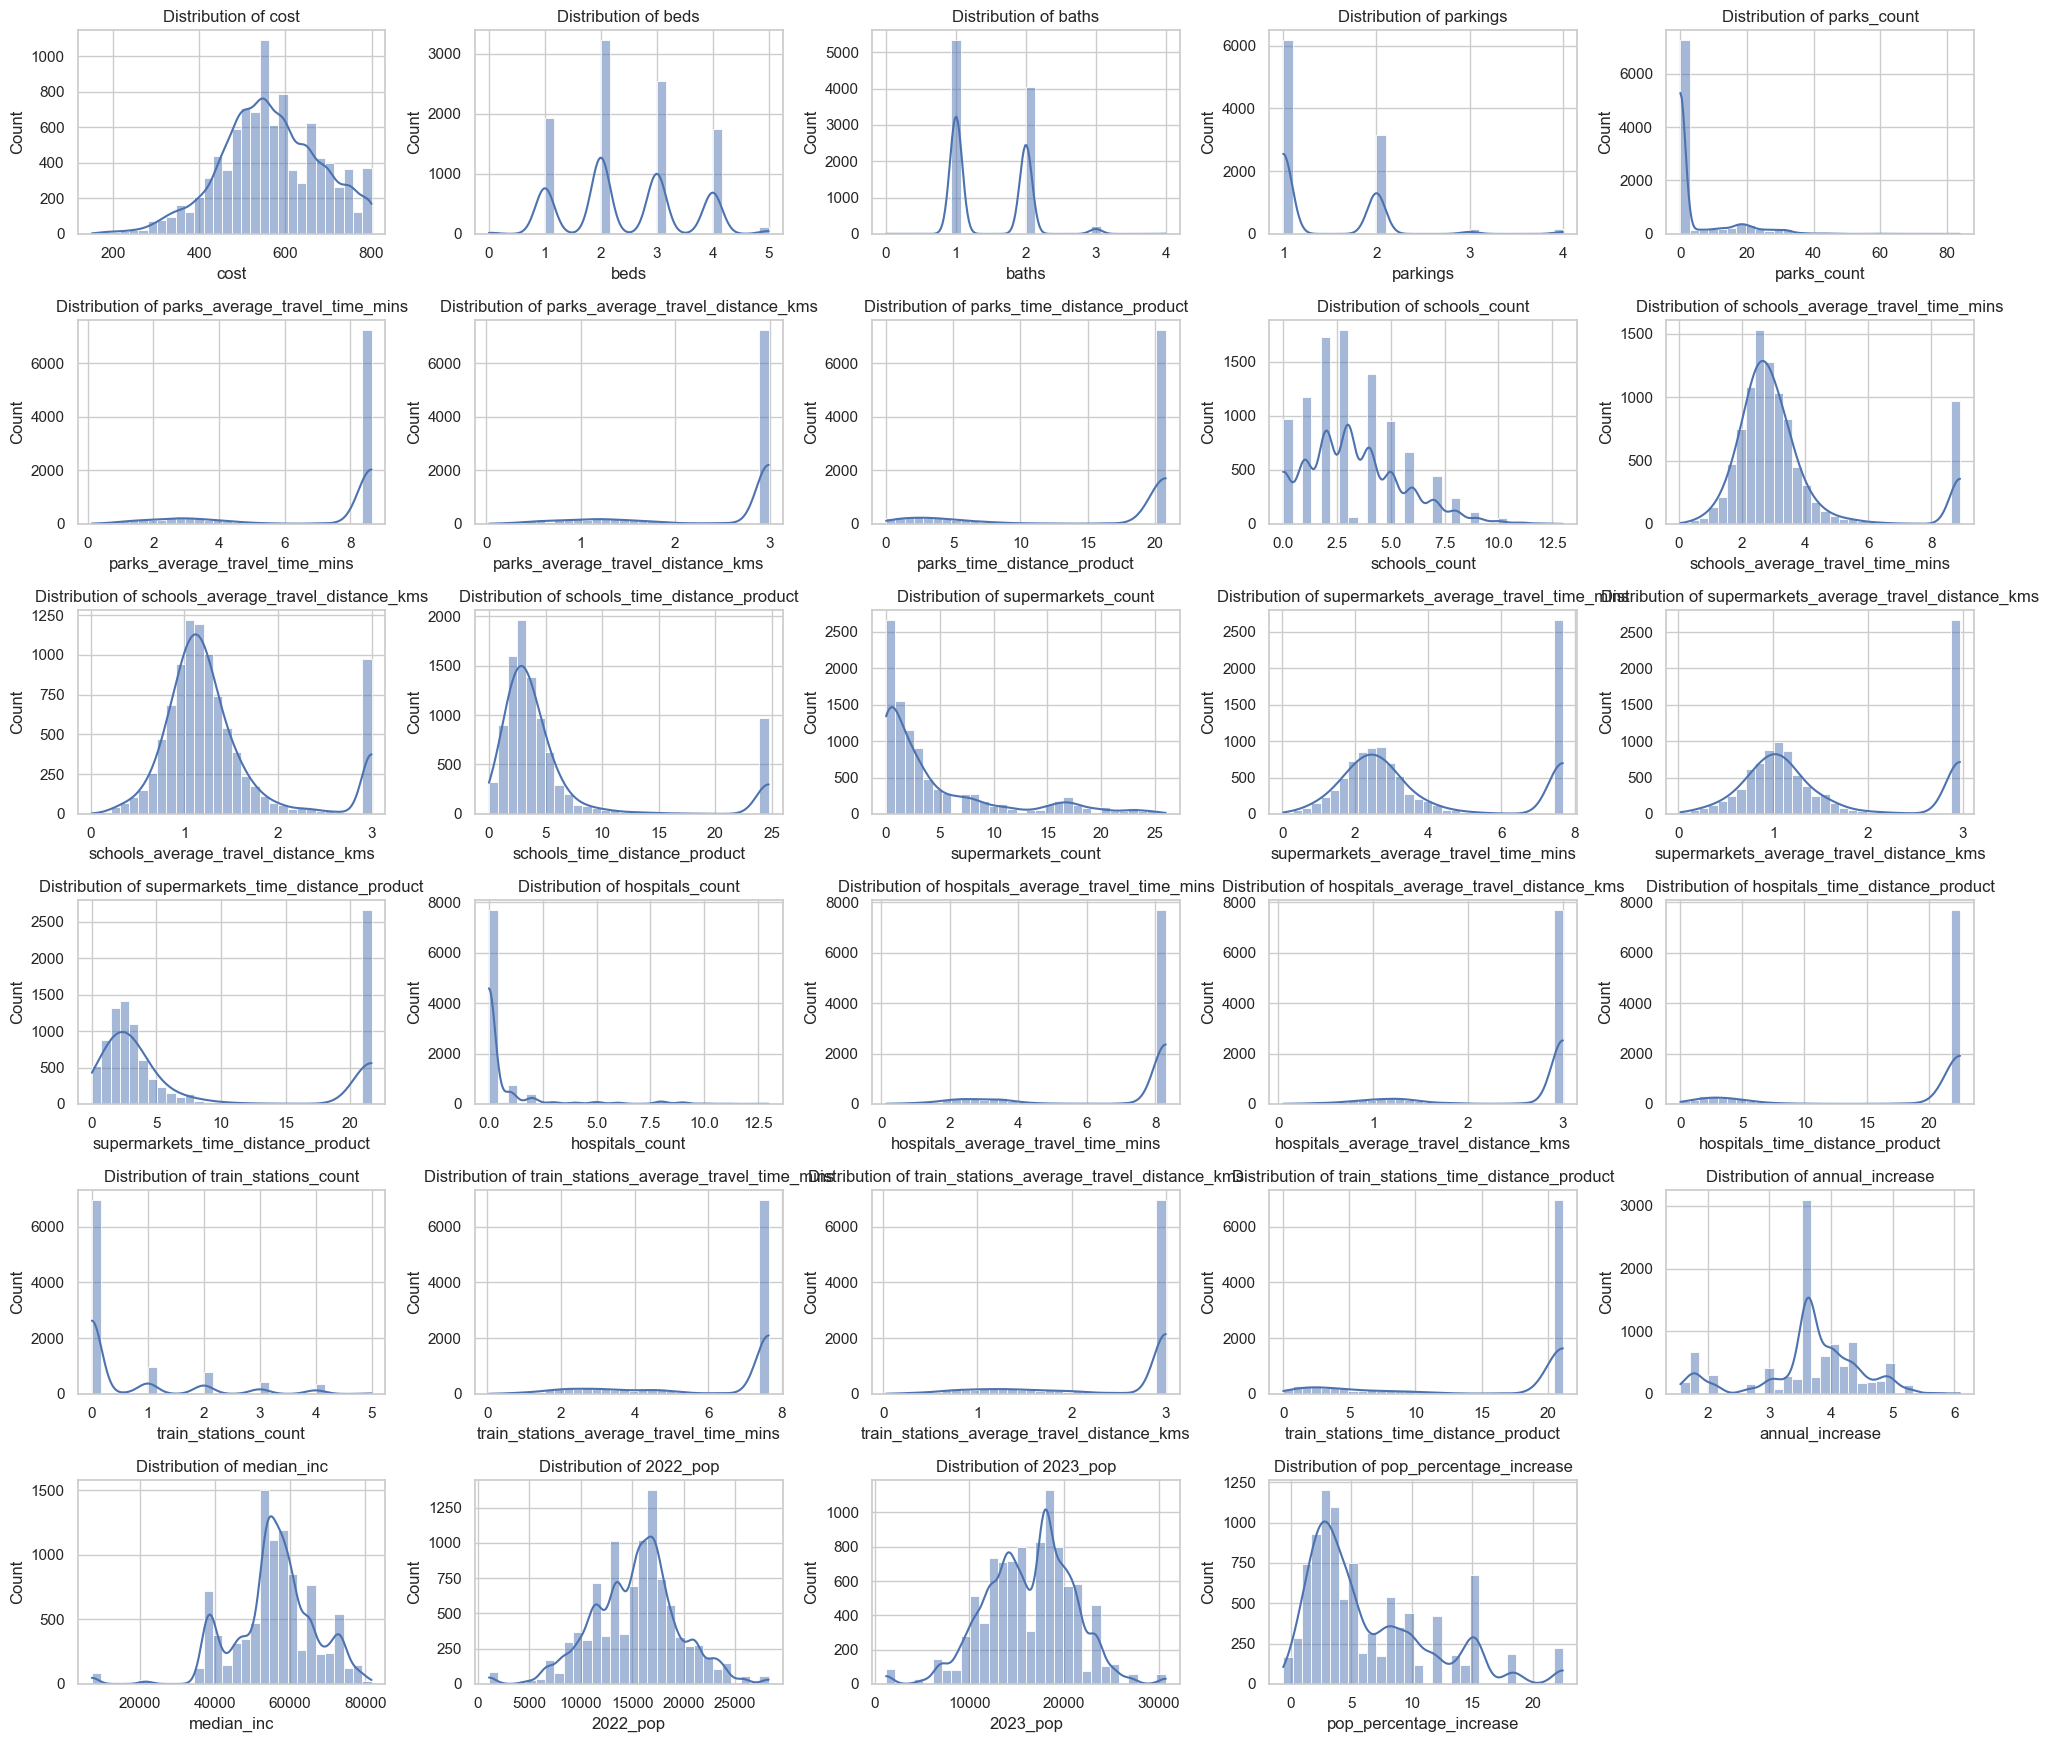

In [65]:
# List of columns to check for distribution
columns_to_check = [
    'cost', 'beds', 'baths', 'parkings', 
    'parks_count', 'parks_average_travel_time_mins', 'parks_average_travel_distance_kms', 'parks_time_distance_product',
    'schools_count', 'schools_average_travel_time_mins', 'schools_average_travel_distance_kms', 'schools_time_distance_product',
    'supermarkets_count', 'supermarkets_average_travel_time_mins', 'supermarkets_average_travel_distance_kms', 'supermarkets_time_distance_product',
    'hospitals_count', 'hospitals_average_travel_time_mins', 'hospitals_average_travel_distance_kms', 'hospitals_time_distance_product',
    'train_stations_count', 'train_stations_average_travel_time_mins', 'train_stations_average_travel_distance_kms', 'train_stations_time_distance_product',
    'annual_increase', 'median_inc', '2022_pop', '2023_pop', 'pop_percentage_increase'
]

# Plot histograms for selected columns
plt.figure(figsize=(20, 20))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(7, 5, i)  # Adjust grid size based on the number of plots
    sns.histplot(df_prop[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Central Tendency and Spread

The histogram shows a **unimodal distribution** with a peak around **200-300 units** of cost (assuming this might be in thousands or as per your specific measurement unit). The data is **right-skewed**, indicating that most properties are clustered at the lower end of the cost spectrum, with fewer properties having a higher cost.

### High Frequency of Lower Costs

There's a significant frequency of properties costing between **100 and 400 units**, which might represent the more affordable segment of the market.

### Long Tail to the Right

The long tail extending towards the higher cost values (over **500 units**) suggests the presence of **high-end properties** that are less frequent but significantly more expensive than the typical properties in the dataset. This tail includes some properties that approach **2000 units** in cost, representing the **luxury market segment**.

### Potential Outliers

Properties with costs approaching **2000 units** could be considered **outliers** compared to the majority of the data, or they might represent a distinct segment of the market (e.g., **luxury real estate**).

In [67]:
df_prop = df_prop.select_dtypes(exclude=['object'])

In [68]:
correlation_matrix = df_prop.corr()  # Compute the correlation matrix

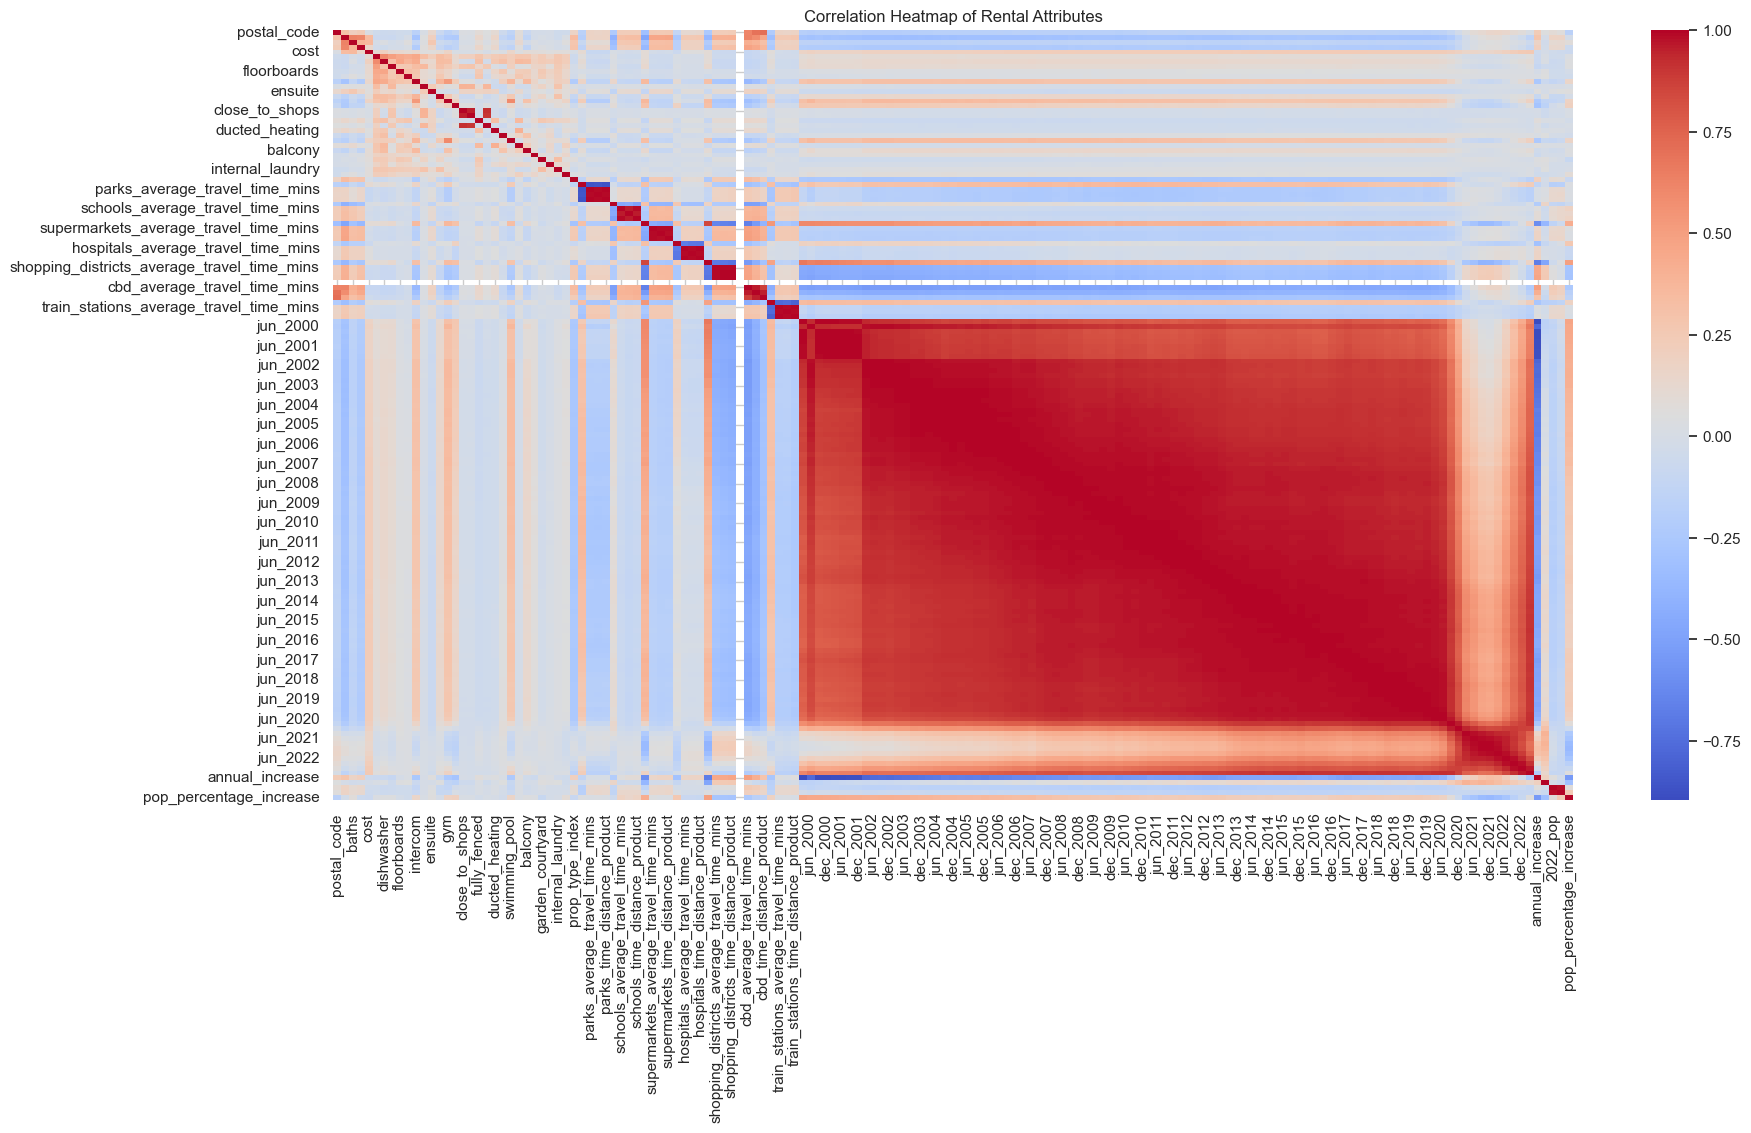

In [69]:
# Create and display the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Rental Attributes')
plt.show()

### Beds and Baths

There is a clear and strong **positive correlation** between the number of beds and baths. This is expected in residential properties, where more bedrooms typically correlate with additional bathrooms. This relationship could be useful in predicting rental prices, as properties with more amenities generally command higher rents.

The strong correlations (like that between beds and baths) should be monitored when used in regression models. High multicollinearity can inflate standard errors, making it difficult to ascertain the individual effect of each feature.

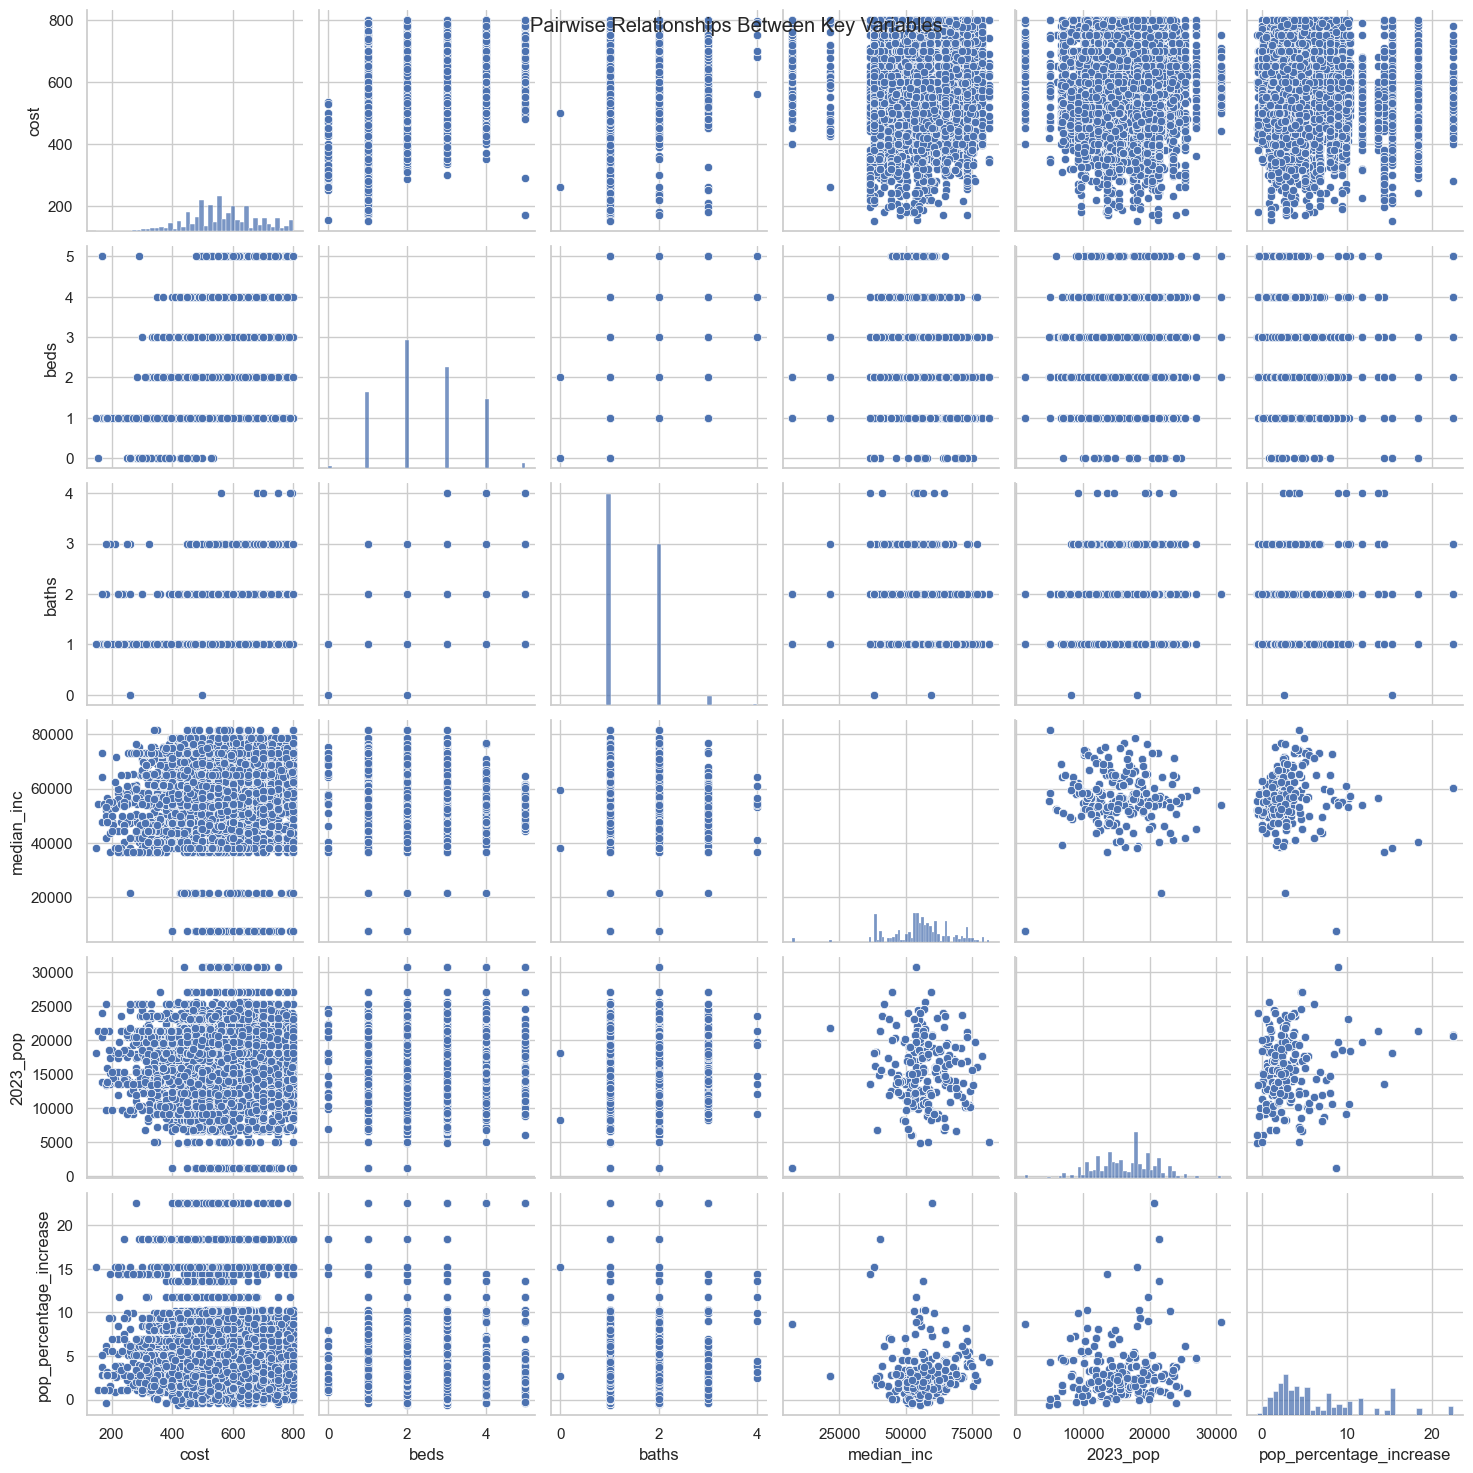

In [70]:
# Selecting a subset of relevant variables
selected_columns = df_prop[['cost', 'beds', 'baths', 'median_inc', '2023_pop', 'pop_percentage_increase']]
sns.pairplot(selected_columns)
plt.suptitle('Pairwise Relationships Between Key Variables')
plt.show()

In [71]:
spark.stop()